In [ ]:
from google.colab import drive
drive.mount('/content/drive')

FOLDER_NAME = 'mlzoomcamp/capstone1'

import sys
sys.path.append(f'/content/drive/My Drive/{FOLDER_NAME}')

In [ ]:
IMAGE_DATASET = f'/content/drive/My Drive/{FOLDER_NAME}/animals/raw-img'

In [ ]:
import os
import matplotlib.pyplot as plt
import shutil
import random
from PIL import Image

In [ ]:
animals_folders = os.listdir(IMAGE_DATASET)
animals_folders

In [ ]:
image_count = 0
for animal_folder in animals_folders:
    animal_path = os.path.join(IMAGE_DATASET, animal_folder)
    if os.path.isdir(animal_path):
        images = os.listdir(animal_path)
        image_count += len(images)

print(f"Total number of images in the dataset: {image_count}")

In [ ]:
to_skip = []
for animal_folder in animals_folders:
  folder_path = os.path.join(IMAGE_DATASET, animal_folder)
  for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, 'rb') as f:
      is_jfif = b"JFIF" in f.peek(10)
      if not is_jfif:
        to_skip.append(file_name)
        print(f'{file_path} is not a valid JPEG file')

print(f'Total number of files to skip: {len(to_skip)}')
print(to_skip)

# print the array to a file, one element per line
with open(f'/content/drive/My Drive/{FOLDER_NAME}/animals/to_skip.txt', 'w') as f:
    for item in to_skip:
        f.write("%s\n" % item)

In [ ]:
to_skip = []
with open(f'/content/drive/My Drive/{FOLDER_NAME}/animals/to_skip.txt', 'r') as f:
    for line in f:
        to_skip.append(line.strip())
print(f'Total number of files to skip: {len(to_skip)}')
to_skip

In [ ]:
image_counts = {}
for animal_folder in animals_folders:
    animal_path = os.path.join(IMAGE_DATASET, animal_folder)
    if os.path.isdir(animal_path):
        image_count = len([f for f in os.listdir(animal_path) if f not in to_skip])
        image_counts[animal_folder] = image_count

total_images = sum(image_counts.values())
print(f"Total number of usable images in the dataset: {total_images}")

plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values())
plt.xlabel("Animal Folders")
plt.ylabel("Number of Images")
plt.title("Number of Images per Animal Folder")
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(image_counts.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
def split_dataset(source_dir, train_dir, val_dir, test_dir, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    for animal_folder in os.listdir(source_dir):
        animal_source_path = os.path.join(source_dir, animal_folder)
        if os.path.isdir(animal_source_path):
            animal_train_path = os.path.join(train_dir, animal_folder)
            os.makedirs(animal_train_path, exist_ok=True)
            animal_val_path = os.path.join(val_dir, animal_folder)
            os.makedirs(animal_val_path, exist_ok=True)
            animal_test_path = os.path.join(test_dir, animal_folder)
            os.makedirs(animal_test_path, exist_ok=True)

            images = [f for f in os.listdir(animal_source_path) if f not in to_skip and os.path.isfile(os.path.join(animal_source_path, f))]
            random.shuffle(images)

            train_split = int(len(images) * train_ratio)
            val_split = int(len(images) * (train_ratio + val_ratio))

            for i, image in enumerate(images):
              source_path = os.path.join(animal_source_path, image)
              if i < train_split:
                  destination_path = os.path.join(animal_train_path, image)
              elif i < val_split:
                  destination_path = os.path.join(animal_val_path, image)
              else:
                  destination_path = os.path.join(animal_test_path, image)
              shutil.copy2(source_path, destination_path)

train_dir = f'/content/drive/My Drive/{FOLDER_NAME}/animals/train'
val_dir = f'/content/drive/My Drive/{FOLDER_NAME}/animals/val'
test_dir = f'/content/drive/My Drive/{FOLDER_NAME}/animals/test'

split_dataset(IMAGE_DATASET, train_dir, val_dir, test_dir)

In [26]:
train_dir = f'/content/drive/My Drive/{FOLDER_NAME}/animals/train'
val_dir = f'/content/drive/My Drive/{FOLDER_NAME}/animals/val'
test_dir = f'/content/drive/My Drive/{FOLDER_NAME}/animals/test'

total_train, total_val, total_test = 0, 0, 0

for animal_folder in animals_folders:
  dir_path = os.path.join(train_dir, animal_folder)
  train_images = len(os.listdir(dir_path))
  dir_path = os.path.join(val_dir, animal_folder)
  val_images = len(os.listdir(dir_path))
  dir_path = os.path.join(test_dir, animal_folder)
  test_images = len(os.listdir(dir_path))

  total_train += train_images
  total_val += val_images
  total_test += test_images

  print(f'{animal_folder}: train={train_images}, val={val_images}, test={test_images}')
  assert train_images + val_images + test_images == image_counts[animal_folder]

print(f'Total train images: {total_train}')
print(f'Total val images: {total_val}')
print(f'Total test images: {total_test}')

farfalla: train=1239, val=413, test=414
cavallo: train=1573, val=525, test=525
scoiattolo: train=1117, val=372, test=373
gatto: train=1000, val=333, test=334
mucca: train=1119, val=373, test=374
pecora: train=1091, val=364, test=364
elefante: train=882, val=294, test=295
cane: train=2929, val=977, test=977
gallina: train=1858, val=620, test=620
ragno: train=2892, val=964, test=965
Total train images: 15700
Total val images: 5235
Total test images: 5241


In [27]:
train_dir_small = f'/content/drive/My Drive/{FOLDER_NAME}/animals/small/train'
val_dir_small = f'/content/drive/My Drive/{FOLDER_NAME}/animals/small/val'
test_dir_small = f'/content/drive/My Drive/{FOLDER_NAME}/animals/small/test'

In [28]:
def copy_subset_of_images(source_dir, dest_dir, percentage):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for animal_folder in os.listdir(source_dir):
        animal_source_path = os.path.join(source_dir, animal_folder)
        if os.path.isdir(animal_source_path):
            animal_dest_path = os.path.join(dest_dir, animal_folder)
            os.makedirs(animal_dest_path, exist_ok=True)

            images = [f for f in os.listdir(animal_source_path) if os.path.isfile(os.path.join(animal_source_path, f))]
            num_images_to_copy = int(len(images) * percentage)
            images_to_copy = random.sample(images, num_images_to_copy)

            for image in images_to_copy:
                source_path = os.path.join(animal_source_path, image)
                dest_path = os.path.join(animal_dest_path, image)
                shutil.copy2(source_path, dest_path)

In [29]:
copy_subset_of_images(train_dir, train_dir_small, 0.3)

In [31]:
copy_subset_of_images(val_dir, val_dir_small, 0.1)

In [32]:
copy_subset_of_images(test_dir, test_dir_small, 0.1)

In [ ]:
image_sizes = {}
dirs = [train_dir, val_dir, test_dir]
for dir in dirs:
  print(dir)
  animals = os.listdir(dir)
  for animal in animals:
    images = os.listdir(os.path.join(dir, animal))
    for image in images:
      image_path = os.path.join(dir, animal, image)
      with Image.open(image_path) as img:
        width, height = img.size
        image_size = (width, height)
        if image_size not in image_sizes:
          image_sizes[image_size] = 1
        else:
          image_sizes[image_size] += 1
print(image_sizes)

In [ ]:
sorted_image_sizes = dict(sorted(image_sizes.items(), key=lambda item: item[1], reverse=True))
sorted_image_sizes

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
tf.__version__, keras.__version__

('2.17.1', '3.5.0')

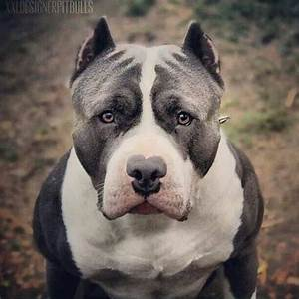

In [37]:
img = load_img(f'{train_dir_small}/cane/OIP-yEBJlf3hvBYjpaa5TbOkOgHaHa.jpeg', target_size=(299, 299))
x = np.array(img)
img
# x.shape

In [38]:
model = Xception(
    weights='imagenet',
    input_shape=(299, 299, 3)
)

In [39]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [40]:
X = preprocess_input(X)
X.shape

(1, 299, 299, 3)

In [41]:
pred = model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(1, 1000)

In [42]:
decode_predictions(pred)

[[('n02093428', 'American_Staffordshire_terrier', 0.93976885),
  ('n02093256', 'Staffordshire_bullterrier', 0.015483038),
  ('n02109047', 'Great_Dane', 0.009942075),
  ('n02108422', 'bull_mastiff', 0.0032774573),
  ('n02109525', 'Saint_Bernard', 0.002931651)]]

In [43]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    train_dir_small, target_size=(150, 150), batch_size=32
)
train_ds.class_indices

Found 4705 images belonging to 10 classes.


{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [44]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    val_dir_small, target_size=(150, 150), batch_size=32, shuffle=False
)

Found 520 images belonging to 10 classes.


In [45]:
base_model = Xception(
    weights='imagenet', include_top=False, input_shape=(150, 150, 3)
)
base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

In [46]:
img = load_img(f'{train_dir_small}/cane/OIP-yEBJlf3hvBYjpaa5TbOkOgHaHa.jpeg', target_size=(150, 150))
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [47]:
preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(1, 10)

In [48]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss = loss, metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 30s 163ms/step - accuracy: 0.7912 - loss: 0.9535 - val_accuracy: 0.8788 - val_loss: 0.9090
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.9368 - loss: 0.3220 - val_accuracy: 0.8923 - val_loss: 0.7525
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.9487 - loss: 0.2171 - val_accuracy: 0.8904 - val_loss: 0.8553
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - accuracy: 0.9765 - loss: 0.1075 - val_accuracy: 0.8692 - val_loss: 1.0840
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.9710 - loss: 0.1224 - val_accuracy: 0.9115 - val_loss: 0.8075
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9801 - loss: 0.0802 - val_accuracy: 0.9135 - val_loss: 0.8387
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.9841 - loss: 0.0589 - val_accuracy: 0.9077 - val_loss: 1.0837
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.9835 - loss: 0.0649 - val

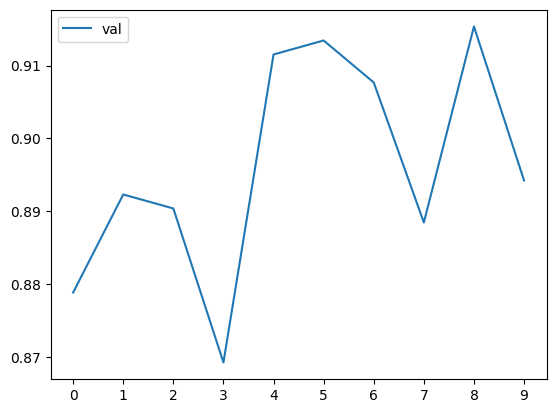

In [49]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [50]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
    weights='imagenet', include_top=False, input_shape=(150, 150, 3)
    )
    base_model.trainable = False
    ###########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner)
    ###########################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss = loss, metrics=['accuracy'])
    return model

In [51]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f'Learning rate: {lr}')
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print()

Learning rate: 0.0001
Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 29s 152ms/step - accuracy: 0.5360 - loss: 1.5260 - val_accuracy: 0.8942 - val_loss: 0.4428
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.8990 - loss: 0.3882 - val_accuracy: 0.9077 - val_loss: 0.3499
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9250 - loss: 0.2671 - val_accuracy: 0.9115 - val_loss: 0.3134
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.9327 - loss: 0.2202 - val_accuracy: 0.9096 - val_loss: 0.3119
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.9459 - loss: 0.1907 - val_accuracy: 0.9135 - val_loss: 0.3033
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.9575 - loss: 0.1575 - val_accuracy: 0.9192 - val_loss: 0.2985
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9618 - loss: 0.1431 - val_accuracy: 0.9135 - val_loss: 0.3026
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accu

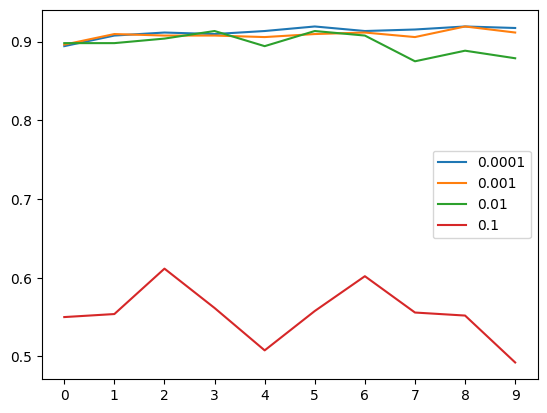

In [52]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.legend()

In [53]:
learning_rate = 0.0001

In [54]:
learning_rate = 0.0001
scores = {}
for size in [10, 100, 1000]:
    print(f'Inner layer size: {size}')
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    print()

Inner layer size: 10
Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 29s 153ms/step - accuracy: 0.2772 - loss: 2.0913 - val_accuracy: 0.4673 - val_loss: 1.5392
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.5369 - loss: 1.4137 - val_accuracy: 0.6750 - val_loss: 1.1431
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.7207 - loss: 1.0470 - val_accuracy: 0.8115 - val_loss: 0.9214
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.8130 - loss: 0.8454 - val_accuracy: 0.8250 - val_loss: 0.7885
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.8551 - loss: 0.6951 - val_accuracy: 0.8538 - val_loss: 0.6744
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.8824 - loss: 0.5769 - val_accuracy: 0.8712 - val_loss: 0.6045
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.8992 - loss: 0.4867 - val_accuracy: 0.8769 - val_loss: 0.5487
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accur

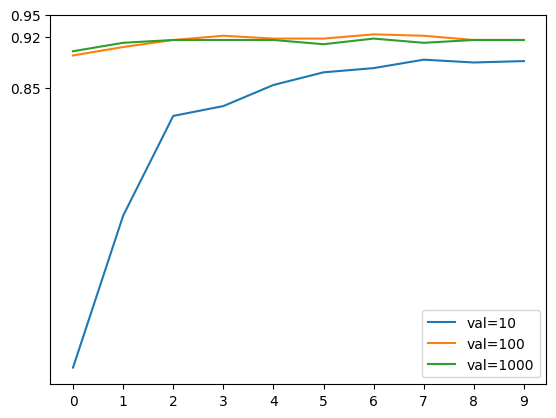

In [58]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=f'val={size}')
plt.xticks(np.arange(10))
plt.yticks([0.85, 0.92, 0.95])
plt.legend()

In [59]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
    weights='imagenet', include_top=False, input_shape=(150, 150, 3)
    )
    base_model.trainable = False
    ###########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    ###########################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss = loss, metrics=['accuracy'])
    return model

In [60]:
learning_rate = 0.0001
size = 1000

scores = {}
for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(f'Droprate: {droprate}')
    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    print()

Droprate: 0.0
Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 27s 142ms/step - accuracy: 0.7268 - loss: 0.9461 - val_accuracy: 0.9077 - val_loss: 0.3333
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.9496 - loss: 0.1906 - val_accuracy: 0.9135 - val_loss: 0.3042
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.9545 - loss: 0.1560 - val_accuracy: 0.9135 - val_loss: 0.3003
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9796 - loss: 0.0908 - val_accuracy: 0.9154 - val_loss: 0.2952
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9919 - loss: 0.0600 - val_accuracy: 0.9192 - val_loss: 0.3095
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.9936 - loss: 0.0452 - val_accuracy: 0.9115 - val_loss: 0.3242
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9977 - loss: 0.0342 - val_accuracy: 0.9096 - val_loss: 0.3215
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.

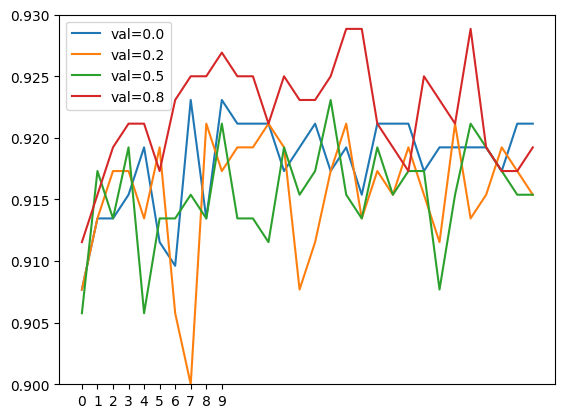

In [62]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=f'val={droprate}')
plt.xticks(np.arange(10))
# plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.ylim(0.9, 0.93)
plt.legend()

In [68]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
    weights='imagenet', include_top=False, input_shape=(input_size, input_size, 3)
    )
    base_model.trainable = False
    ###########################################
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    ###########################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss = loss, metrics=['accuracy'])
    return model

In [66]:
input_size = 299

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=False,
    horizontal_flip=True,
)
train_ds = train_gen.flow_from_directory(
    train_dir_small, target_size=(input_size, input_size), batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    val_dir_small, target_size=(input_size, input_size), batch_size=32, shuffle=False
)

Found 4705 images belonging to 10 classes.
Found 520 images belonging to 10 classes.


In [67]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
input_size = 299
learning_rate = 0.0001
size_inner = 1000
droprate = 0.8

model = make_model(input_size=input_size, learning_rate=learning_rate, size_inner=size_inner, droprate=droprate)
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

In [70]:
trained_model = keras.models.load_model('xception_08_0.977.keras')
input_size = 299
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds = test_gen.flow_from_directory(
    test_dir_small, target_size=(input_size, input_size), batch_size=32, shuffle=False
)
trained_model.evaluate(test_ds)

Found 520 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.9788 - loss: 0.0716


[0.09510990977287292, 0.9769230484962463]

In [85]:
trained_model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)          │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_13          │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1000)                │       2,049,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,038,512 (103.14 MB)

 Trainable params: 2,059,010 (7.85 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 4,118,022 (15.71 MB)

In [84]:
classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "dog": "cane",
    "elephant": "elefante",
    "butterfly": "farfalla",
    "chicken": "gallina",
    "cat": "gatto",
    "cow": "mucca",
    "spider": "ragno",
    "squirrel": "scoiattolo",
}
path = f'{test_dir_small}/cavallo/OIP--v2M4dNO-UVypF77vUD06gHaE7.jpeg'
img = load_img(path, target_size=(input_size, input_size))
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)
pred = trained_model.predict(X)
all = dict(zip(classes, pred[0]))
predicted_animal = max(all, key=all.get)
print(f'Predicted animal: {translate[predicted_animal]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted animal: horse
